# scRNAseq

Heatmap of inducible macrophage genes (Bhatt et al., 2012) detected by scRNA-seq in wild-type (grey) and Rad21-/- macrophages (red).

Fraction of cells with detectable transcripts for inducible genes.

The expression level of LPS-inducible transcripts in cells with detectable transcripts is plotted as ln(CPM +1). Boxes show upper and lower quartiles and whiskers show 1.5 of the interquartile range. Numbers represent adjusted P-values. Wilcoxon signed rank test with Bonferroni correction for multiple testing. One experiment with 1362 cells.!

In [1]:
ENV["Code"] = "../../Code"
for folder in readdir(ENV["Code"]); push!(LOAD_PATH, normpath(ENV["Code"], folder));end

using Seaborn, PyPlot, PyCall, DataFrames
using NoLongerProblems_Pandas, Pandas
using MultipleTesting, HypothesisTests 
using SingleCellExperiment
using CSV, ProgressMeter,PrettyPlotting, ScikitLearn
@sk_import linear_model: LogisticRegression

include("../Databases/Cuartero2018.jl")
include("../Databases/Bhatt2012.jl")
include("../Databases/MF_SingleCell.jl")
include("Load_scRNAseqData.jl")

sce = SingleCellExperiment.fit_mu_std_alpha(sce, splitdataby = :Sample, assay = "CPM")
sce = SingleCellExperiment.fit_single_cell_logistic_regression(sce, assay = "CPM")
bhattgenes = Bhatt2012.inducible_genes_figure3()[!,:GeneSymbol];

Progress: 100%|█████████████████████████████████████████| Time: 0:00:42


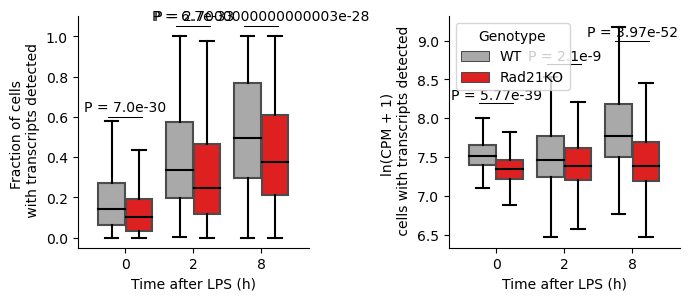

Percent 20.0%
Total genes considered 356


In [2]:
alpha = 0.2
include("adjustalphaRW.jl")

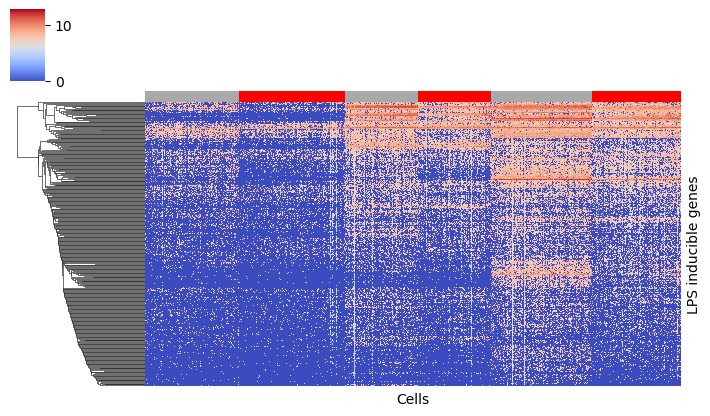

Percent 20.0%
Total genes considered 356


/Users/irr15/.julia/conda/3/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


In [3]:
include("HmapWR.jl")

In [4]:
m = DataFrames.DataFrame(Matrix{Any}(subsubsce.assays["lnCPMplus1"]), :auto)
newcols = subsubsce.colData[!,:RowName].*"__" .*subsubsce.colData[!,:Genotype].*subsubsce.colData[!,:Timepoint]
cols = names(m)
for ii in 1:length(cols)
    rename!(m, cols[ii]=> newcols[ii])
end
m[!,:Gene] = subsubsce.rowData[!,:GeneID]
CSV.write("../SourceData/Fig4c_heatmap.csv",m)

"../SourceData/Fig4c_heatmap.csv"

In [5]:
import Pkg; Pkg.status()

      Status `~/.julia/environments/v1.6/Project.toml`
  [7e6ae17a] BioSequences v2.0.5
  [336ed68f] CSV v0.9.11
  [8f4d0f93] Conda v1.5.2
  [a93c6f00] DataFrames v1.2.2
  [31c24e10] Distributions v0.25.28
  [c2308a5c] FASTX v1.2.0
  [09f84164] HypothesisTests v0.10.6
  [7073ff75] IJulia v1.23.2
  [916415d5] Images v0.24.1
  [96684042] InformationMeasures v0.3.1
  [10e44e05] MATLAB v0.8.2
  [f8716d33] MultipleTesting v0.5.0
  [92933f4c] ProgressMeter v1.7.1
  [438e738f] PyCall v1.92.5
  [d330b81b] PyPlot v2.10.0
  [6f49c342] RCall v0.13.12
  [d2ef9438] Seaborn v1.0.0
  [2913bbd2] StatsBase v0.33.13
